In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
data=pd.read_csv('train.csv')
data.shape
data.head()
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [2]:
pd.isnull(data).sum()#check for null values

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [3]:
#drop null values
data.dropna(inplace=True)

In [4]:
data['Postal Code']=data['Postal Code'].astype('int')

In [5]:
data['Postal Code'].dtypes


dtype('int64')

In [6]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [7]:
data.describe()

,Row ID,Postal Code,Sales
count,9789.000000,9789.000000,9789.000000
mean,4896.705588,55273.322403,230.116193
std,2827.486899,32041.223413,625.302079
min,1.000000,1040.000000,0.444000
25%,2449.000000,23223.000000,17.248000
50%,4896.000000,58103.000000,54.384000
75%,7344.000000,90008.000000,210.392000
max,9800.000000,99301.000000,22638.480000


# EXPLORING DATA
   SHIP MODE


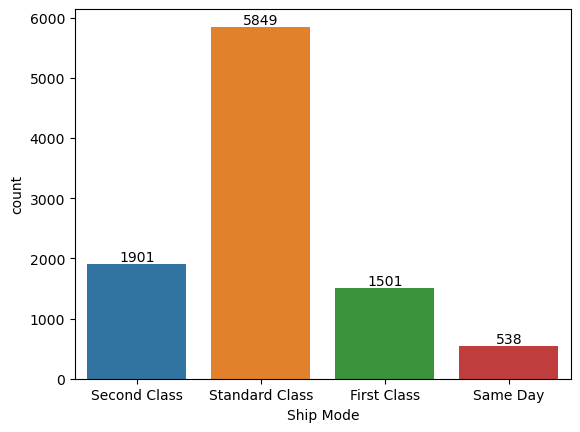

In [8]:
ax = sns.countplot(x = 'Ship Mode',data=data)#plotting by ship mode

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Ship Mode', ylabel='Sales'>

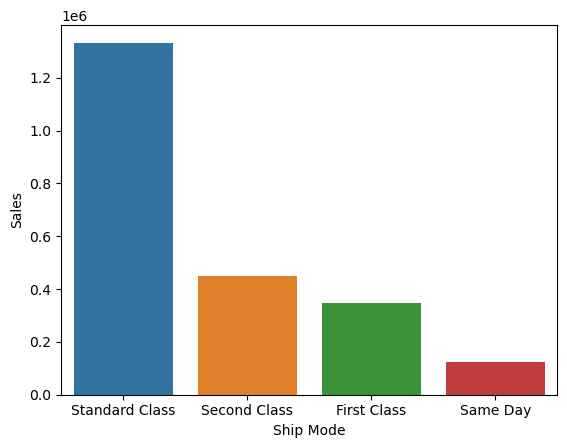

In [9]:
#plot of ship mode vs total sales
sales_gen = data.groupby(['Ship Mode'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)

sns.barplot(x = 'Ship Mode',y= 'Sales' ,data = sales_gen)

### STATE

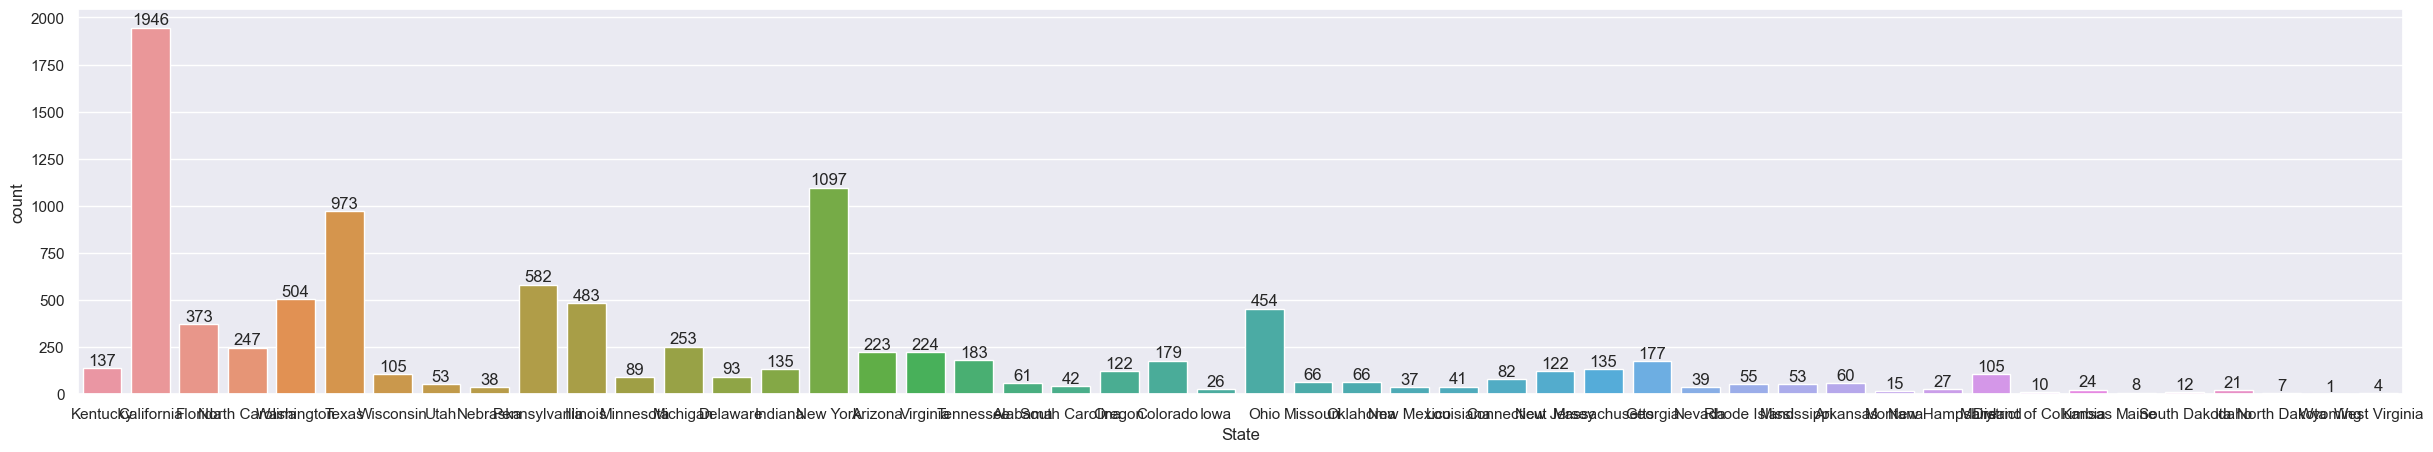

In [15]:
sns.set(rc={'figure.figsize':(30,5)})
ax = sns.countplot(data = data, x = 'State')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='State', ylabel='Sales'>

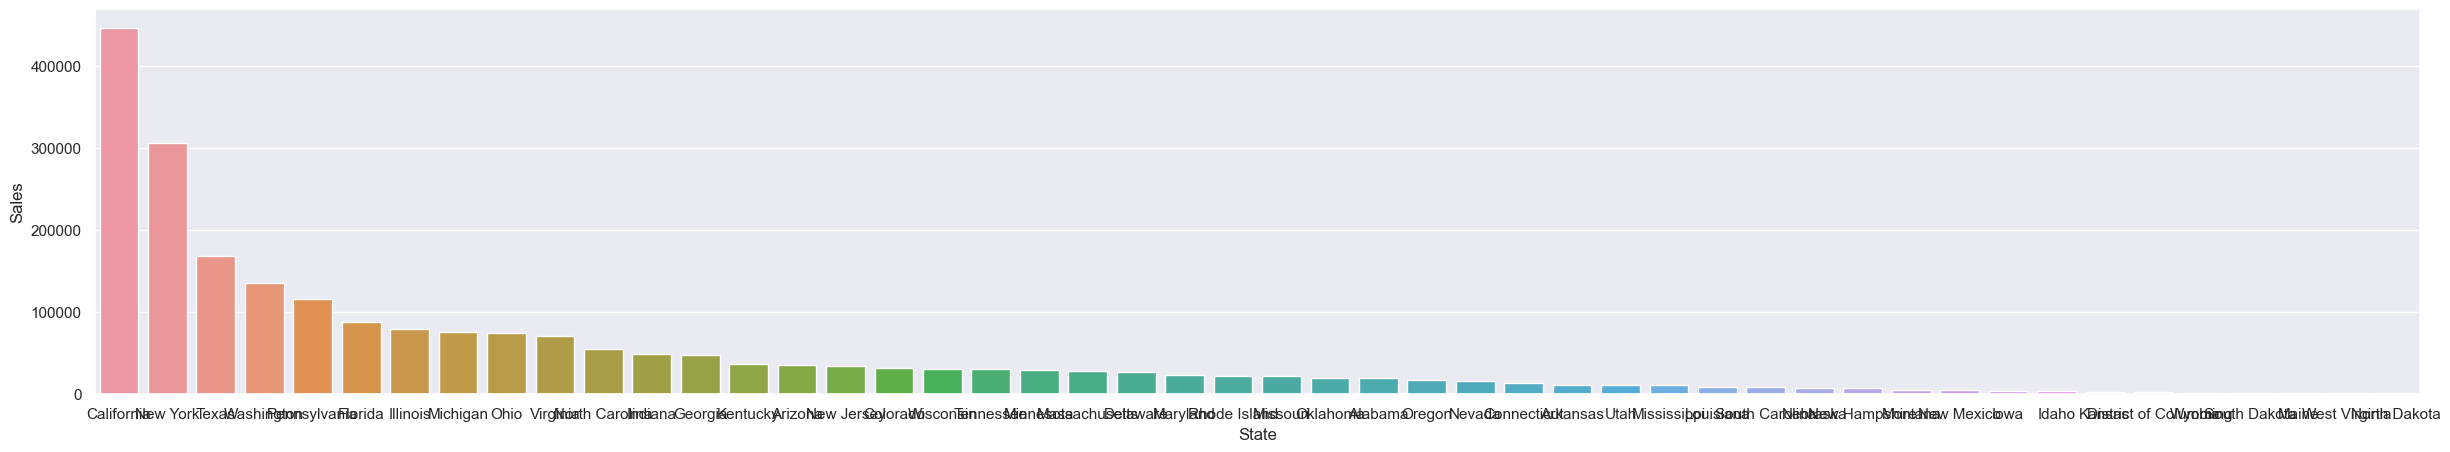

In [16]:
#plot of states vs total sales
sales_gen = data.groupby(['State'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)

sns.barplot(x = 'State',y= 'Sales' ,data = sales_gen)


<Axes: xlabel='State', ylabel='Sales'>

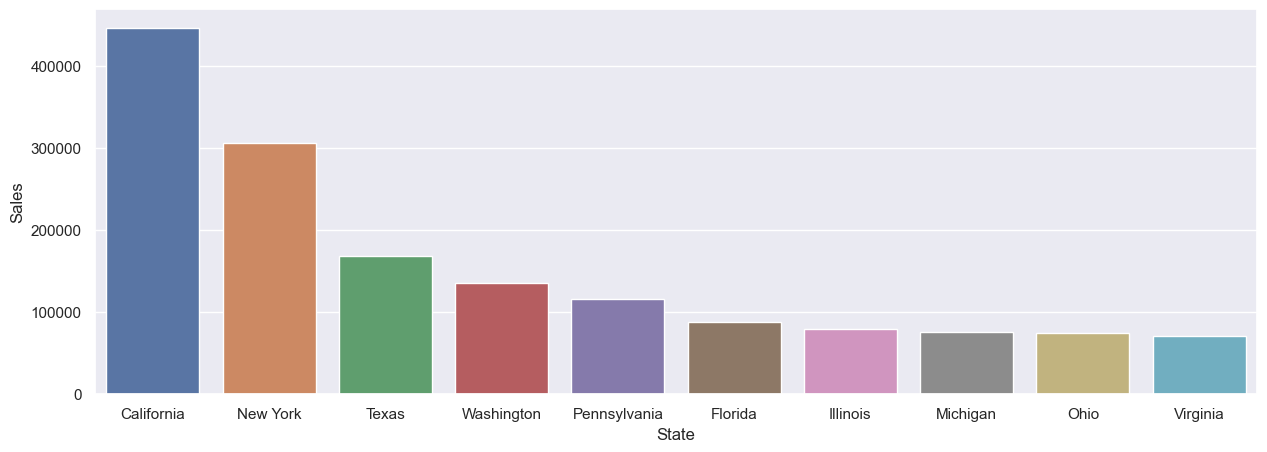

In [18]:
#plot of top 10 states with total sales
sales_state = data.groupby(['State'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Sales')

### REGION


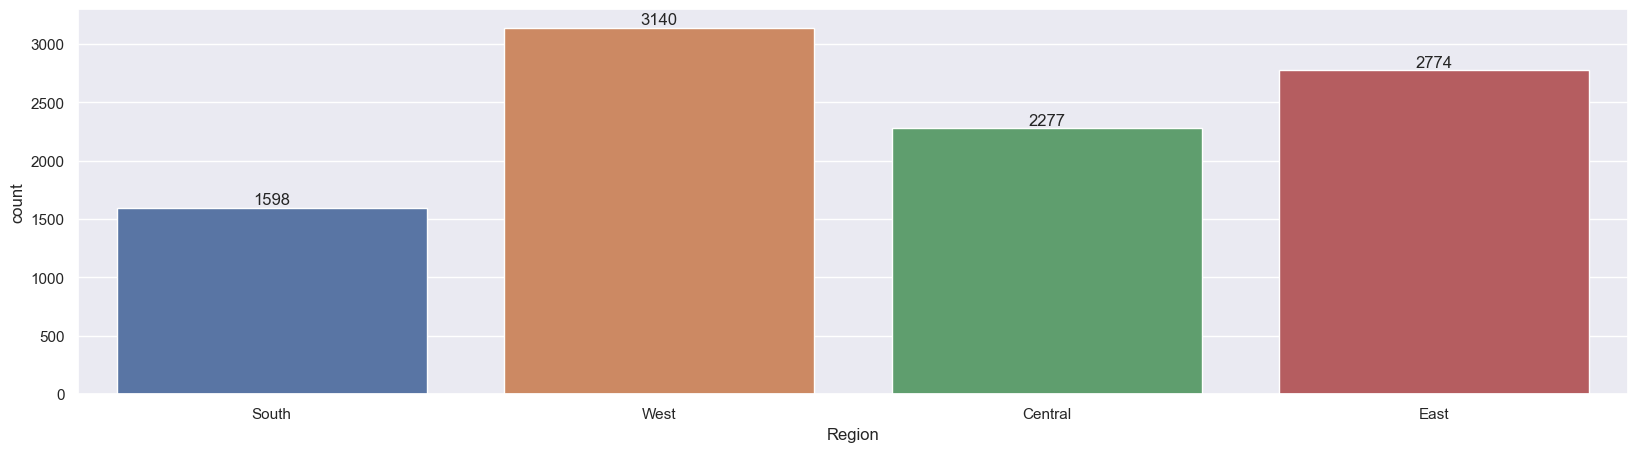

In [20]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = data, x = 'Region')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Region', ylabel='Sales'>

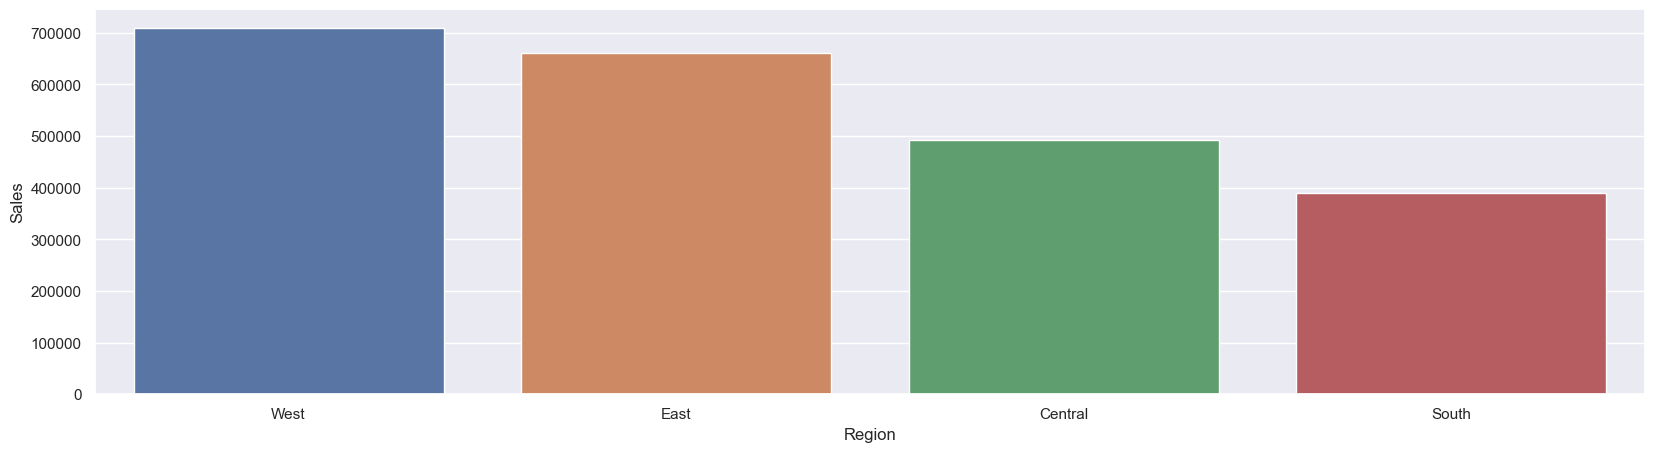

In [21]:
sales_gen = data.groupby(['Region'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)

sns.barplot(x = 'Region',y= 'Sales' ,data = sales_gen)


### PRODUCT Name


<Axes: xlabel='Product Name', ylabel='Sales'>

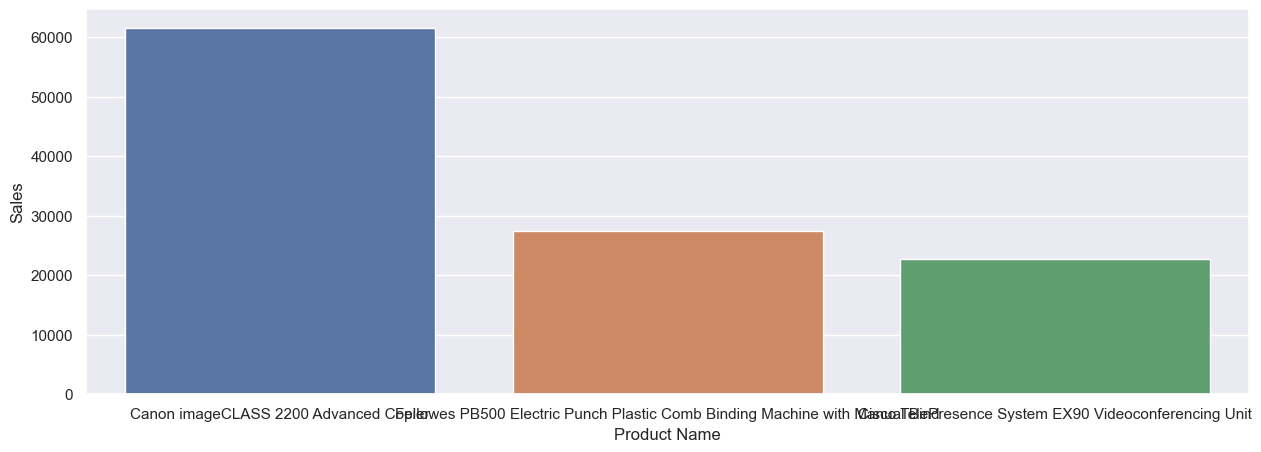

In [30]:
sales_state = data.groupby(['Product Name'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False).head(3)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'Product Name',y= 'Sales')

### CONCLUSION
According to the above dataset we can say that the product which is sold the most is Canon imageCLASS2200 Advanced Copier by the Standard class of shipping mode in the west region of california.